In [ ]:
# hide
# importing requirements
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.8 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
# hide
# importing requirements
from fastbook import *
from fastai.vision.widgets import *

# Getting images from Bing

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '3e02f44c61c1427e87c97c52d9fc300e')

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
# creating a list with 150 URL from stratocaster images
results = search_images_bing(key, 'stratocaster')
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
# getting the first URL
ims[0]

'https://cdn.shopify.com/s/files/1/0251/8505/8919/products/fendercustomshop_strat_vintagewh_r100605-1.jpg?v=1566941362'

In [ ]:
dest = 'images/stratocaster.jpg'
download_url(ims[0], dest)

Path('images/stratocaster.jpg')

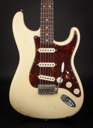

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
# defining guitar types and our main path for the guitar images
# v1 guitar_types = 'stratocaster','telecaster','les paul', 'sg'
guitar_types = 'Stratocaster','Flying v','Les paul'
path = Path('guitars')

In [ ]:
# getting the URL for all guitar_types and saving them into separated folders according to their types
if not path.exists():
    path.mkdir()
    for o in guitar_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} guitar')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#443) [Path('guitars/Stratocaster/7aa2454f-2a80-4b7f-9972-ff59475c29c7.jpg'),Path('guitars/Stratocaster/f3b775f4-b97c-47c1-b0b3-c70ae462f4fe.jpg'),Path('guitars/Stratocaster/9b725cc5-4528-48f7-ace7-4a7264d830c4.jpg'),Path('guitars/Stratocaster/551ae097-67f1-467d-8f69-ecfb18e104c4.jpg'),Path('guitars/Stratocaster/285d9534-2ece-4063-b955-555199e6cb89.jpg'),Path('guitars/Stratocaster/dd0c1b75-23d7-431c-a2cd-126d86b4e0bc.jpg'),Path('guitars/Stratocaster/19748d83-ed9d-4746-8a0d-aece48bcf595.jpg'),Path('guitars/Stratocaster/b16c3cb2-4e2b-45e0-aae0-7430fff3ca31.jpg'),Path('guitars/Stratocaster/6d84424b-9372-413f-8233-cb47ca89f458.jpg'),Path('guitars/Stratocaster/38012ac5-2334-4384-bf21-13ddd62c3b55.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#5) [Path('guitars/Flying v/29d787ae-33a1-44d4-b57d-e5be2225955b.jpg'),Path('guitars/Flying v/c5218396-7fcd-41ad-a2a2-a61d8dc743b7.jpg'),Path('guitars/Flying v/e0587029-b178-468e-81e5-3c943e224d2d.png'),Path('guitars/Flying v/1400a2a5-78bf-4b67-a5b6-810ebe1a1e1f.jpg'),Path('guitars/Flying v/5a3bee1b-6b50-48c2-8836-bf38d5b557bc.jpg')]

In [ ]:
failed.map(Path.unlink);

## From Data to DataLoaders

In [ ]:
# Creating our data block, which is has images and we'll work with categories (Stratocaster','Flying v','Les paul)
# We'll separete randomly 20% of the images and seed them to use the same all the time, using directoty name as category, resizing to 128
guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
# defining our dataloaders with the guitar data block
dls = guitars.dataloaders(path)

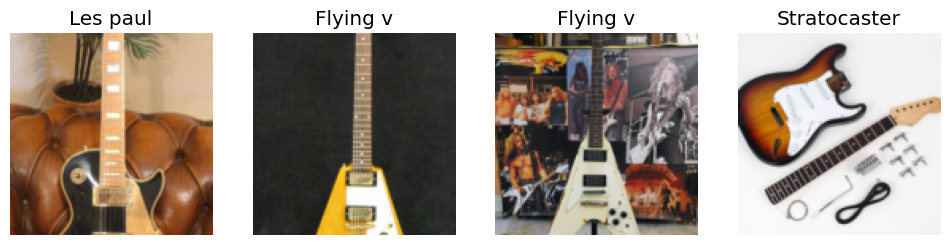

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# not used, just tested
# guitars = guitars.new(item_tfms=Resize(128, ResizeMethod.Squish))
# dls = guitars.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# not used, just tested
# guitars = guitars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dls = guitars.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# not used, just tested
# guitars = guitars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
# dls = guitars.dataloaders(path)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

In [ ]:
# not used, just tested
# guitars = guitars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = guitars.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [ ]:
# not used, just tested
# guitars = guitars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
# dls = guitars.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

IndentationError: ignored

In [ ]:
# training our model
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

In [ ]:
# generation the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

In [ ]:
interp.confusion_matrix()

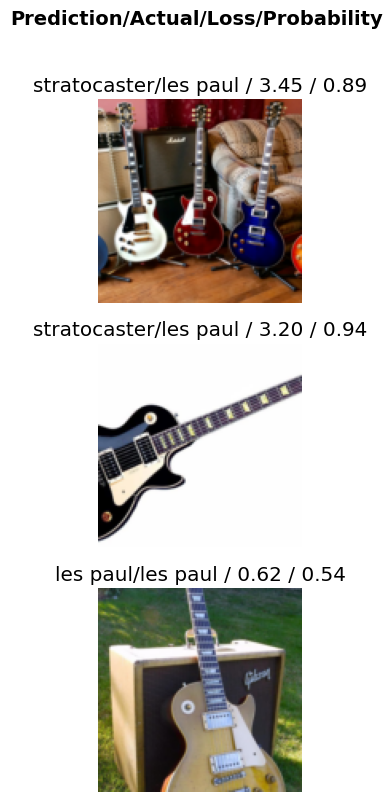

In [ ]:
interp.plot_top_losses(3, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

In [ ]:
learn_inf.dls.vocab

['flying v', 'les paul', 'stratocaster']

### Turning Your Notebook into a Real App

Go to [Huggingface](https://huggingface.co/spaces/sahviola/guitar-classifier) to see the results ;)